In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import time


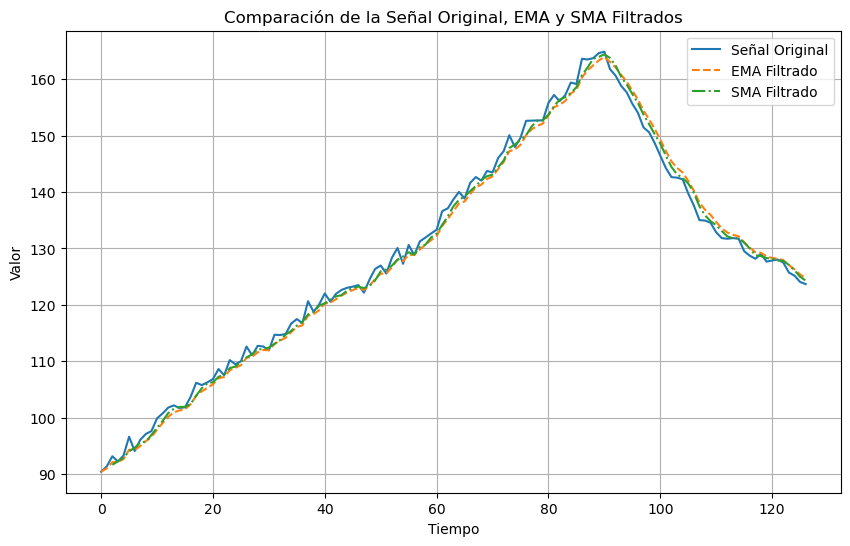

Tiempo promedio de ejecución de 1 iteraciones: 2.11052 segundos


In [2]:
def ejecutar_script(ruta_data):
    T_inicio = time.time()
    
    # Cargar el archivo .xlsx en un DataFrame de Pandas
    data = pd.read_excel(ruta_data)

    # Datos de BPM
    bpm_señal = data['BPM']

    # Calcular EMA con un factor de suavizado de 0.4 (alpha=0.4)
    EMA = bpm_señal.ewm(alpha=0.4).mean()

    # Calcular SMA con una ventana de 3 puntos
    sma = bpm_señal.rolling(window=3).mean()

    # Crear un DataFrame con las señales originales y filtradas
    datafra = pd.DataFrame({'Original': bpm_señal, 'EMA': EMA, 'SMA': sma})

    # Graficar las señales
    
    plt.figure(figsize=(10, 6))
    plt.plot(datafra['Original'], label='Señal Original')
    plt.plot(datafra['EMA'], label='EMA Filtrado', linestyle='--')
    plt.plot(datafra['SMA'], label='SMA Filtrado', linestyle='-.')
    plt.title('Señal Original, EMA y SMA Filtrados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show() 
    
    T_final = time.time()
    tiempo_ejecucion = T_final - T_inicio
    return tiempo_ejecucion

# Ruta del archivo
ruta_data = "C:\\Users\\jeiso\\Documents\\Jupyter NoteBook\\Datos\\Dataset.xlsx"

# Ejecutar el script 200 veces y calcular el tiempo promedio de ejecución
T_total = 0
iteraciones = 1
for _ in range(iteraciones):
    tiempo = ejecutar_script(ruta_data)
    T_total += tiempo

T_ejecucion_promedio = T_total / iteraciones
print("Tiempo promedio de ejecución de {} iteraciones: {:.5f} segundos".format(iteraciones, T_ejecucion_promedio))
